# ==============

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Sample_Superstore.csv', encoding='latin1')
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
# Cek missing value
print("Jumlah missing value tiap kolom:")
print(df.isnull().sum())

# Hapus baris dengan missing value (jika ada)
df_clean = df.dropna()

# Hapus duplikasi data
df_clean = df_clean.drop_duplicates()

# Ubah nama kolom menjadi lowercase dan tanpa spasi
df_clean.columns = df_clean.columns.str.lower().str.replace(' ', '_')

# Cek tipe data
print("\nTipe data tiap kolom:")
print(df_clean.dtypes)

# Contoh konversi kolom tanggal (jika ada kolom 'order_date')
if 'order_date' in df_clean.columns:
    df_clean['order_date'] = pd.to_datetime(df_clean['order_date'], errors='coerce')

# Tampilkan 5 data teratas setelah cleaning
df_clean.head()

Jumlah missing value tiap kolom:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Tipe data tiap kolom:
row_id             int64
order_id          object
order_date        object
ship_date         object
ship_mode         object
customer_id       object
customer_name     object
segment           object
country           object
city              object
state             object
postal_code        int64
region            object
product_id        object
category          object
sub-category      object
product_name      object
sales            float64
quantity           int64
discount         float64
profit           float64
dtype: 

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
# Tampilkan informasi DataFrame setelah cleaning
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   object        
 4   ship_mode      9994 non-null   object        
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_id     9994 non-null   object        
 14  category       9994 non-null   object        
 15  sub-category   9994 n

In [6]:
# Filter kolom yang diinginkan
kolom_pilihan = ['order_id', 'order_date', 'category', 'sub-category','sales', 'profit', 'region']
df_filtered = df_clean[kolom_pilihan]

# Tampilkan 5 data teratas hasil filtering
df_filtered.head()

,order_id,order_date,category,sub-category,sales,profit,region
0,CA-2016-152156,2016-11-08,Furniture,Bookcases,261.9600,41.9136,South
1,CA-2016-152156,2016-11-08,Furniture,Chairs,731.9400,219.5820,South
2,CA-2016-138688,2016-06-12,Office Supplies,Labels,14.6200,6.8714,West
3,US-2015-108966,2015-10-11,Furniture,Tables,957.5775,-383.0310,South
4,US-2015-108966,2015-10-11,Office Supplies,Storage,22.3680,2.5164,South


C:\Users\wahyu\AppData\Local\Temp\ipykernel_9008\3643118959.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=profit_per_category, x='category', y='profit', order=order_kategori, palette='viridis')


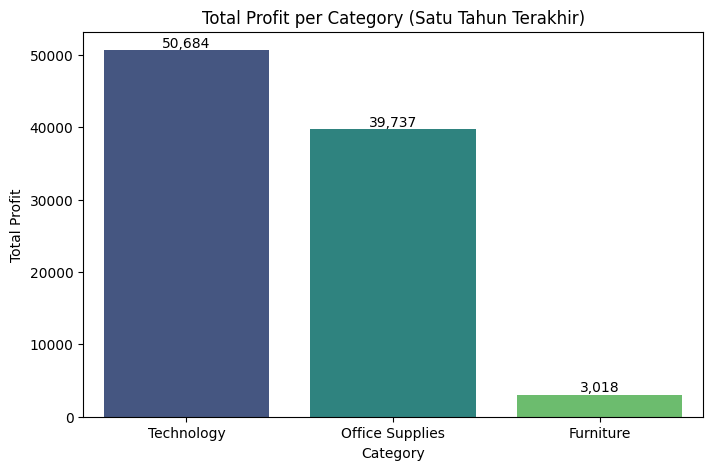

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data satu tahun terakhir
tahun_terakhir = df_clean['order_date'].dt.year.max()
df_last_year = df_clean[df_clean['order_date'].dt.year == tahun_terakhir]

# Hitung total profit per category
profit_per_category = df_last_year.groupby('category')['profit'].sum().reset_index()

# Urutkan kategori berdasarkan profit dari besar ke kecil
order_kategori = profit_per_category.sort_values('profit', ascending=False)['category']

# Plot barplot dengan urutan kategori dari besar ke kecil
plt.figure(figsize=(8,5))
ax = sns.barplot(data=profit_per_category, x='category', y='profit', order=order_kategori, palette='viridis')
plt.title('Total Profit per Category (Satu Tahun Terakhir)')
plt.xlabel('Category')
plt.ylabel('Total Profit')

# Tambahkan label di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.show()

C:\Users\wahyu\AppData\Local\Temp\ipykernel_9008\733055982.py:14: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = df_last_year.groupby([pd.Grouper(freq='Q'), 'category'])['sales'].sum().reset_index()


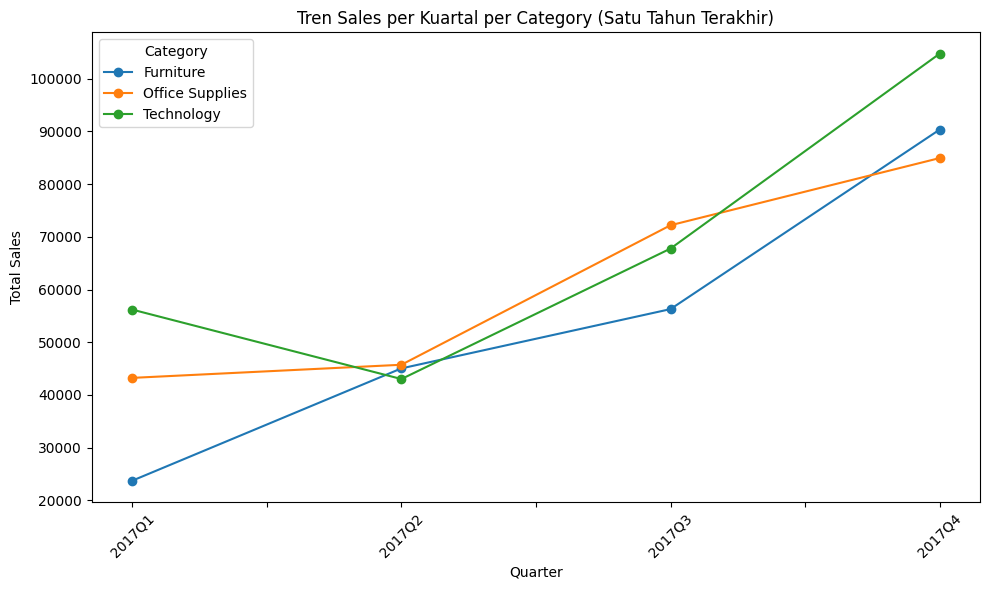

In [9]:
import matplotlib.pyplot as plt

# Pastikan kolom order_date sudah dalam format datetime
df_clean['order_date'] = pd.to_datetime(df_clean['order_date'], errors='coerce')

# Ambil data satu tahun terakhir
tahun_terakhir = df_clean['order_date'].dt.year.max()
df_last_year = df_clean[df_clean['order_date'].dt.year == tahun_terakhir]

# Set order_date sebagai index
df_last_year = df_last_year.set_index('order_date')

# Grouping sales per quartal dan kategori
quarterly_sales = df_last_year.groupby([pd.Grouper(freq='Q'), 'category'])['sales'].sum().reset_index()

# Ubah kolom order_date menjadi string format "YYYY-Qn"
quarterly_sales['quarter'] = quarterly_sales['order_date'].dt.to_period('Q').astype(str)

# Pivot agar kategori jadi kolom
quarterly_sales_pivot = quarterly_sales.pivot(index='quarter', columns='category', values='sales')

# Plot lineplot
plt.figure(figsize=(10,6))
quarterly_sales_pivot.plot(marker='o', ax=plt.gca())
plt.title('Tren Sales per Kuartal per Category (Satu Tahun Terakhir)')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\wahyu\AppData\Local\Temp\ipykernel_9008\2769274584.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_last_year, x='sub-category', y='profit', palette='viridis')


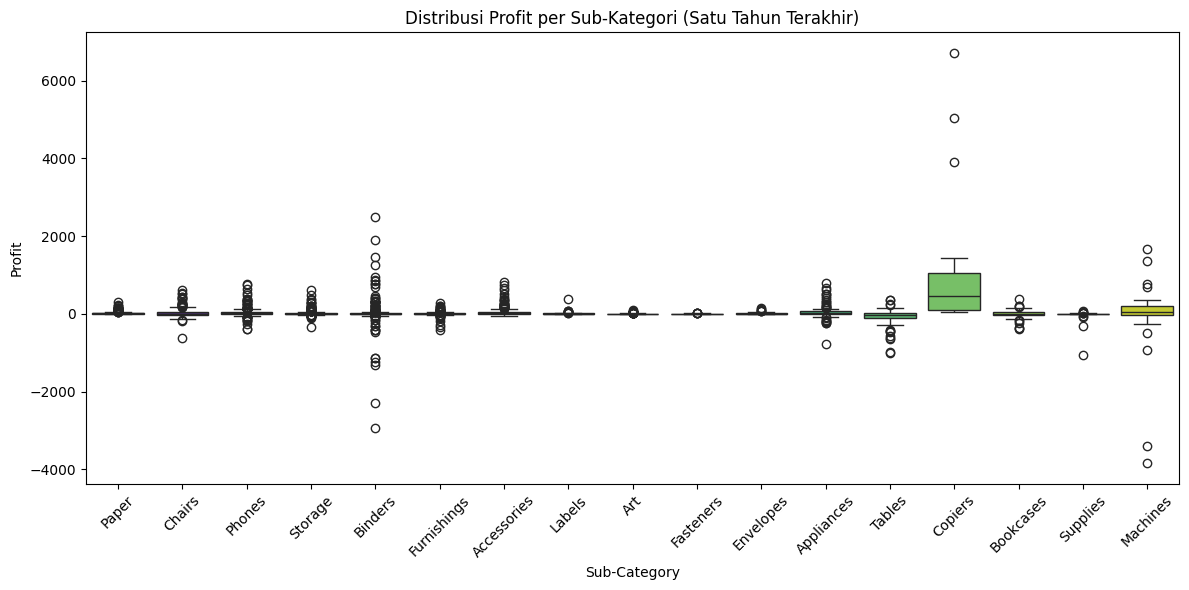

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data satu tahun terakhir
tahun_terakhir = df_clean['order_date'].dt.year.max()
df_last_year = df_clean[df_clean['order_date'].dt.year == tahun_terakhir]

# Boxplot distribusi profit per sub-kategori
plt.figure(figsize=(12,6))
sns.boxplot(data=df_last_year, x='sub-category', y='profit', palette='viridis')
plt.title('Distribusi Profit per Sub-Kategori (Satu Tahun Terakhir)')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()

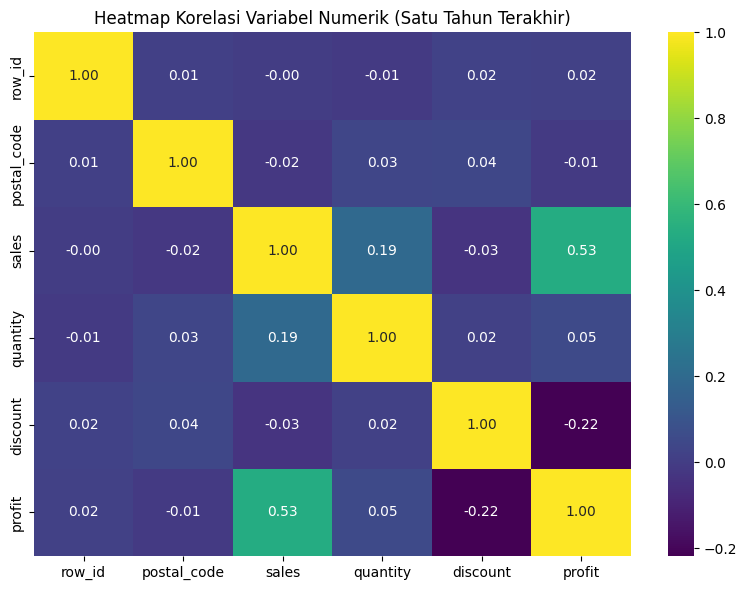

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data satu tahun terakhir
tahun_terakhir = df_clean['order_date'].dt.year.max()
df_last_year = df_clean[df_clean['order_date'].dt.year == tahun_terakhir]

# Pilih hanya kolom numerik
numerik = df_last_year.select_dtypes(include='number')

# Hitung korelasi
corr = numerik.corr()

# Plot heatmap korelasi
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.title('Heatmap Korelasi Variabel Numerik (Satu Tahun Terakhir)')
plt.tight_layout()
plt.show()